In [1]:
import numpy as np
from scipy.stats import ks_2samp,skewnorm
import matplotlib.pyplot as plt
import pickle

In [2]:
a=[4,4,4,4,4]
b=[4,3,4,4,4]
c=[4,4,3,0,1]
d=[4,4,3,0,0,0,1]

0.0 1.0


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+01, 1.300e+01,
        1.500e+01, 9.000e+00, 1.200e+01, 1.700e+01, 2.500e+01, 2.800e+01,
        2.400e+01, 3.100e+01, 4.600e+01, 4.100e+01, 5.800e+01, 6.300e+01,
        9.200e+01, 9.400e+01, 1.030e+02, 1.120e+02, 1.320e+02, 1.470e+02,
        2.090e+02, 2.130e+02, 2.350e+02, 2.350e+02, 2.660e+02, 3.410e+02,
        3.450e+02, 4.040e+02, 4.410e+02, 4.810e+02, 5.450e+02, 6.110e+02,
        6.350e+02, 7.020e+02, 7.810e+02, 8.810e+02, 9.190e+02, 1.024e+03,
        1.043e+03, 1.140e+03, 1.236e+03, 1.270e+03, 1.376e+03, 1.420e+03,
        1.553e+03, 1.601e+03, 1.649e+03, 1.768e+03, 1.716e+03, 1.804e+03,
        1.803e+03, 1.832e+03, 1.841e+03, 1.832e+03, 1.847e+03, 1.694e+03,
        1.625e+03, 1.548e+03, 1.409e+0

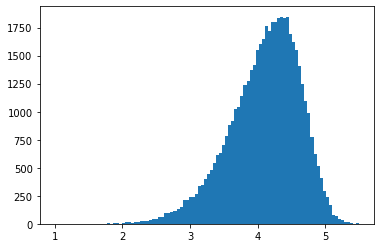

In [3]:
np.random.seed(42)
distr=skewnorm.rvs(a=-3,size=50000)
distr=(distr-distr.min())/(distr.max()-distr.min())
print(distr.min(),distr.max())
# dataset=np.sqrt(distr)
dataset=distr*4.5
plt.hist(dataset+1,bins=100)

In [4]:
np.unique(dataset.astype('int'),return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([   31,  1591, 17252, 30407,   719], dtype=int64))

In [5]:
print(ks_2samp(dataset,a))
print(ks_2samp(dataset,b))
print(ks_2samp(dataset,c))
print(ks_2samp(dataset,d))

KstestResult(statistic=0.98562, pvalue=1.2297715052774115e-09)
KstestResult(statistic=0.78562, pvalue=0.0009059670305324128)
KstestResult(statistic=0.39938, pvalue=0.31043234354842375)
KstestResult(statistic=0.5708085714285714, pvalue=0.011017842615598426)


In [6]:
def score(a):
    return 1e5/ks_2samp(dataset,a).statistic

In [7]:
score_a = score(a)
score_b=score(b)
score_c=score(c)
score_d=score(d)
print(score_a,score_b,score_c,score_d)

101458.98013433168 127288.00183294722 250388.101557414 175190.08123814338


In [8]:
with open(b'metric_dist.pkl','wb') as f:
    pickle.dump(dataset,f)

In [9]:
with open(b'metric_dist.pkl','rb') as f:
    new_dataset=pickle.load(f)

In [10]:
ks_2samp(dataset,new_dataset)

KstestResult(statistic=0.0, pvalue=1.0)